In [36]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [37]:
df = pd.read_csv("diabetes.csv")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
df.shape

(768, 9)

In [40]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
## Create a copy of your dataset to filter outliers
dfd = df.copy()

## Check original shape of the dataset
print(dfd.shape)

(768, 9)


In [44]:
## Determine the three quartiles of a set of data
## A quantile is a series of values, or cut points, that divide a set of data into equal parts 
## A 'quartile' is a specical kind of quantile that divides the data into four equal parts

dfd['Pregnancies'].quantile(.25) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

1.0

In [45]:

dfd['Pregnancies'].quantile(.50) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

3.0

In [46]:

dfd['Pregnancies'].quantile(.75) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

6.0

In [47]:

dfd['Glucose'].quantile(.25) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

99.0

In [48]:

dfd['Glucose'].quantile(.50) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

117.0

In [49]:

dfd['Glucose'].quantile(.75) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

140.25

In [50]:

dfd['BloodPressure'].quantile(.25) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

62.0

In [51]:

dfd['BloodPressure'].quantile(.25) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

62.0

In [52]:

dfd['BloodPressure'].quantile(.25) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

62.0

In [53]:

dfd['SkinThickness'].quantile(.25) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

0.0

In [54]:

dfd['SkinThickness'].quantile(.50) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

23.0

In [55]:

dfd['SkinThickness'].quantile(.75) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

32.0

In [56]:

dfd['BMI'].quantile(.50) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

32.0

In [57]:

dfd['BMI'].quantile(.50) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

32.0

In [58]:

dfd['BMI'].quantile(.75) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

36.6

In [59]:

dfd['DiabetesPedigreeFunction'].quantile(.25) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

0.24375

In [60]:

dfd['DiabetesPedigreeFunction'].quantile(.50) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

0.3725

In [61]:

dfd['DiabetesPedigreeFunction'].quantile(.75) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

0.62625

In [62]:

dfd['Age'].quantile(.25) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

24.0

In [63]:

dfd['Age'].quantile(.50) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

29.0

In [64]:

dfd['Age'].quantile(.75) 

#Q1 = .25
#Q2 = .50
#Q3 = .75

41.0

In [71]:
## Drop rows with above index values
dfd = dfd.drop(z_outliers)


NameError: name 'z_outliers' is not defined

In [ ]:
dfd.shape

In [ ]:
## Calculate quartiles
q1 = dfd["Glucose"].quantile(.25)
q3 = dfd["Glucose"].quantile(.75)

print("Q1:", q1)
print("Q3:", q3)

In [ ]:
## Calculate the IQR
iqr = q3 - q1

print("IQR:", iqr)

In [ ]:
## Determine outlier fences 
top = q3 + (iqr * 1.5)
bottom = q1 - (iqr * 1.5)


print("Upper Limit:", top)
print("Lower Limit:", bottom)

In [ ]:
## Determine the index locations for rows that fall outside of outlier fences

iqr_outliers = dfd.loc[(dfd['Glucose'] > top) | (dfd['Glucose'] < bottom)].index

print("INDEX VALUES:", iqr_outliers)

In [ ]:
## what values can we find at these index locations?

dfd.loc[[8, 13, 75, 182, 258, 260, 342, 359, 399, 440, 561, 579, 595, 661,
            748]]

In [ ]:
## Calculate quartiles
q1 = dfd["BloodPressure"].quantile(.25)
q3 = dfd["BloodPressure"].quantile(.75)

print("Q1:", q1)
print("Q3:", q3)

In [ ]:
## Calculate the IQR
iqr = q3 - q1

print("IQR:", iqr)

In [ ]:
## Determine outlier fences 
top = q3 + (iqr * 1.5)
bottom = q1 - (iqr * 1.5)


print("Upper Limit:", top)
print("Lower Limit:", bottom)

In [ ]:
## Determine the index locations for rows that fall outside of outlier fences

iqr_outliers = dfd.loc[(dfd['BloodPressure'] > top) | (dfd['BloodPressure'] < bottom)].index

print("INDEX VALUES:", iqr_outliers)

In [ ]:
## what values can we find at these index locations?

dfd.iloc[[18,  60,  78,  81, 106, 125, 172, 177, 261, 266, 269, 300, 332,
            336, 347, 426, 430, 435, 453, 484, 494, 589, 597, 619, 697, 703]]

In [ ]:
## Drop rows with above index values
dfd = dfd.drop(iqr_outliers)

## Re-check the shape of the dataframe, how many rows were dropped?
print(dfd.shape)

In [ ]:
## Calculate quartiles
q1 = dfd["SkinThickness"].quantile(.25)
q3 = dfd["SkinThickness"].quantile(.75)

print("Q1:", q1)
print("Q3:", q3)

In [ ]:
## Calculate the IQR
iqr = q3 - q1

print("IQR:", iqr)

In [ ]:
## Determine outlier fences 
top = q3 + (iqr * 1.5)
bottom = q1 - (iqr * 1.5)


print("Upper Limit:", top)
print("Lower Limit:", bottom)

In [ ]:
## Determine the index locations for rows that fall outside of outlier fences

iqr_outliers = dfd.loc[(dfd['SkinThickness'] > top) | (dfd['SkinThickness'] < bottom)].index

print("INDEX VALUES:", iqr_outliers)

In [ ]:
## Calculate quartiles
q1 = dfd["Insulin"].quantile(.25)
q3 = dfd["Insulin"].quantile(.75)

print("Q1:", q1)
print("Q3:", q3)

In [ ]:
## Calculate the IQR
iqr = q3 - q1

print("IQR:", iqr)

In [ ]:
## Determine outlier fences 
top = q3 + (iqr * 1.5)
bottom = q1 - (iqr * 1.5)


print("Upper Limit:", top)
print("Lower Limit:", bottom)

In [ ]:
## Determine the index locations for rows that fall outside of outlier fences

iqr_outliers = dfd.loc[(dfd['Insulin'] > top) | (dfd['Insulin'] < bottom)].index

print("INDEX VALUES:", iqr_outliers)

In [ ]:
## Calculate quartiles
q1 = dfd["BMI"].quantile(.25)
q3 = dfd["BMI"].quantile(.75)

print("Q1:", q1)
print("Q3:", q3)

In [ ]:
## Calculate the IQR
iqr = q3 - q1

print("IQR:", iqr)

In [ ]:
## Determine outlier fences 
top = q3 + (iqr * 1.5)
bottom = q1 - (iqr * 1.5)


print("Upper Limit:", top)
print("Lower Limit:", bottom)

In [ ]:
## Determine the index locations for rows that fall outside of outlier fences

iqr_outliers = dfd.loc[(dfd['BMI'] > top) | (dfd['BMI'] < bottom)].index

print("INDEX VALUES:", iqr_outliers)

In [ ]:
## Calculate quartiles
q1 = dfd["DiabetesPedigreeFunction"].quantile(.25)
q3 = dfd["DiabetesPedigreeFunction"].quantile(.75)

print("Q1:", q1)
print("Q3:", q3)

In [ ]:
## Calculate the IQR
iqr = q3 - q1

print("IQR:", iqr)

In [ ]:
## Determine outlier fences 
top = q3 + (iqr * 1.5)
bottom = q1 - (iqr * 1.5)


print("Upper Limit:", top)
print("Lower Limit:", bottom)

In [ ]:
## Determine the index locations for rows that fall outside of outlier fences

iqr_outliers = dfd.loc[(dfd['DiabetesPedigreeFunction'] > top) | (dfd['DiabetesPedigreeFunction'] < bottom)].index

print("INDEX VALUES:", iqr_outliers)

In [ ]:
df.info()

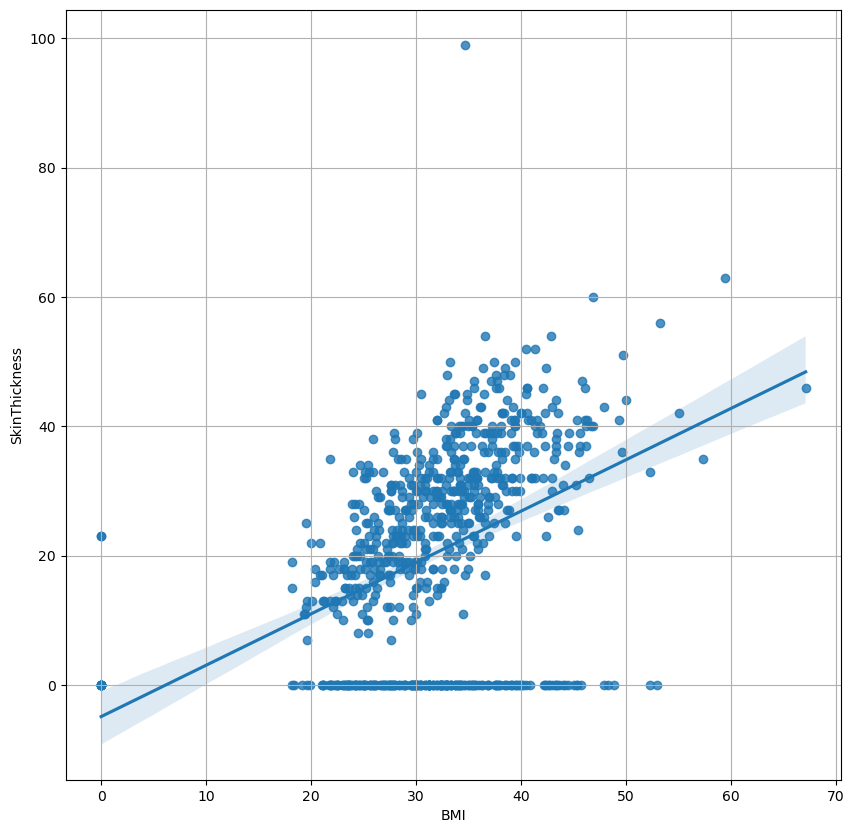

In [70]:
### create a scatterplot to show the linear relationship between attack and defense; with regression line

plt.figure(figsize=(10,10))

sns.regplot(x = df["BMI"], y = df["SkinThickness"], fit_reg = True)

plt.grid()

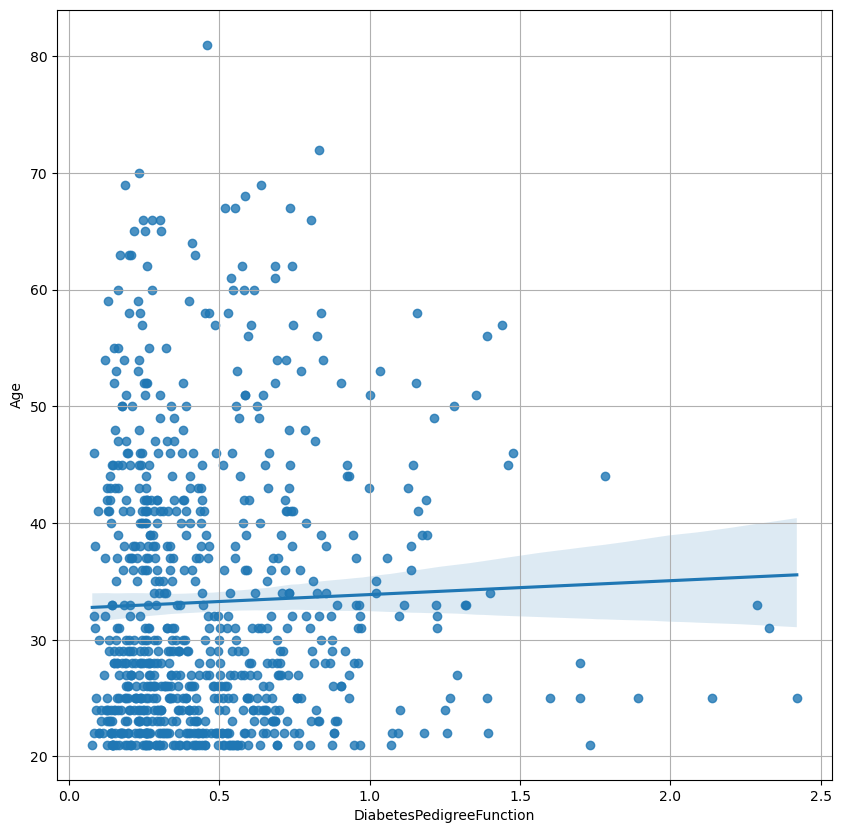

In [67]:

plt.figure(figsize=(10,10))

sns.regplot(x = df["DiabetesPedigreeFunction"], y = df["Age"], fit_reg = True)

plt.grid()

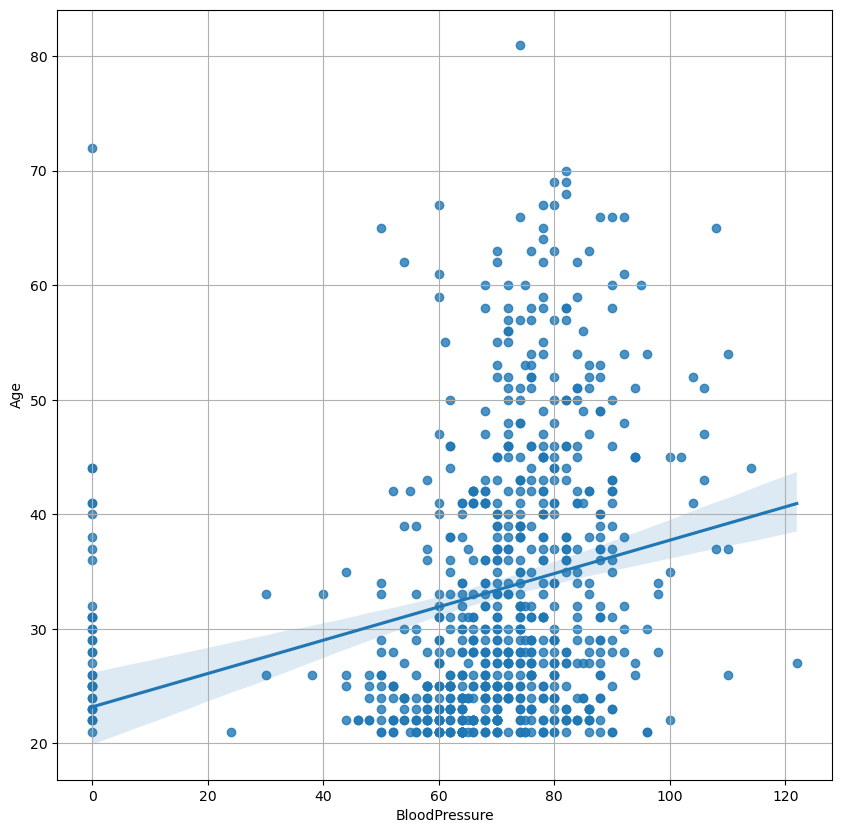

In [68]:

plt.figure(figsize=(10,10))

sns.regplot(x = df["BloodPressure"], y = df["Age"], fit_reg = True)

plt.grid()

<AxesSubplot:>

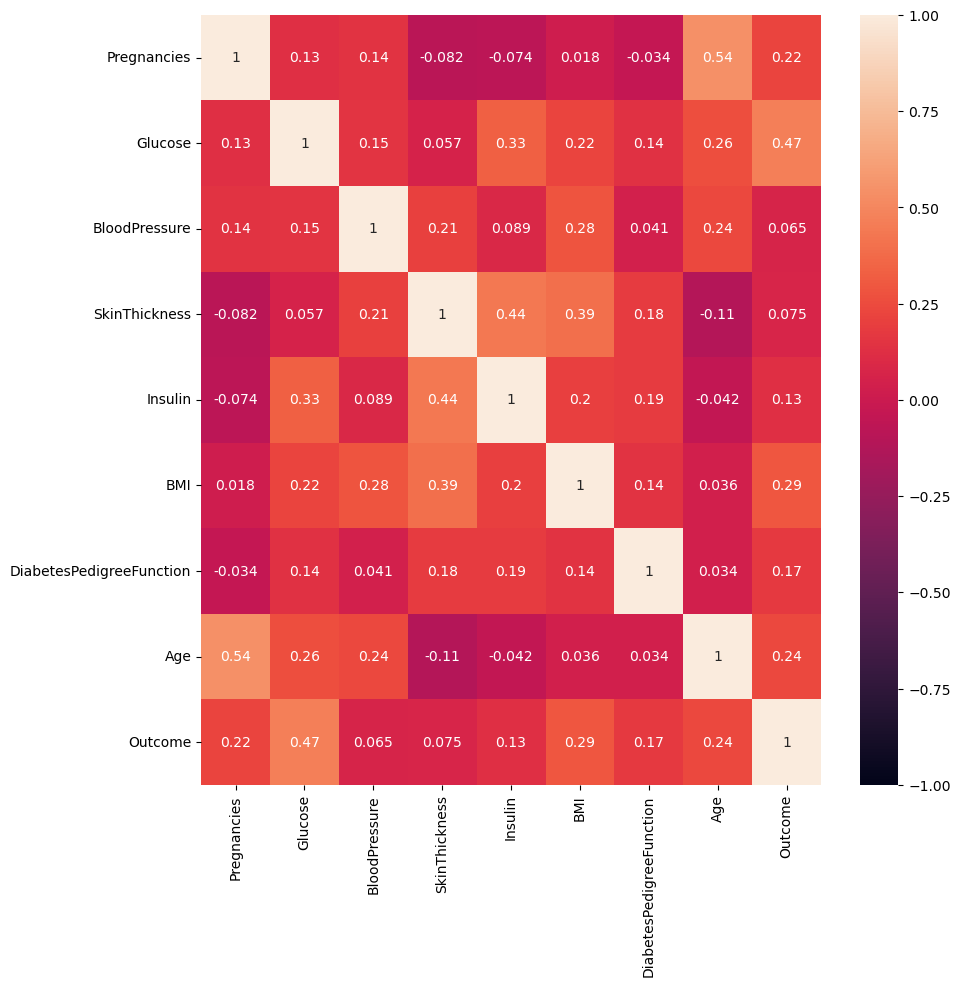

In [66]:
# show correlation of stats via heatmap
plt.figure(figsize=(10,10))

# calculate the correlation matrix for the numeric dataset 
corr = df.corr()

# plot a heat map to show the magnitude of the correlation between variables
sns.heatmap(corr, vmin = -1, annot = True)